In [ ]:
# 머신러닝 용어정리
# 귀납법
# 정형데이터
# 지도학습 -->분류,회귀

#KNN 이진분류 (오렌지와 자몽의 분류)

- instance base
- hyper-parameter 정하는 것이 관건
- 분류를 위해 만들어진, but 회귀로 사용

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [ ]:
# 1. 데이터 로딩

In [ ]:
citrus= pd.read_csv('citrus.csv')
citrus.shape

(10000, 6)

In [ ]:
df= citrus.copy()
df.head(10)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
5,orange,4.59,95.86,142,100,2
6,orange,4.64,97.94,156,85,2
7,orange,4.65,98.50,142,74,2
8,orange,4.68,100.20,159,90,16
9,orange,4.69,100.31,161,76,6


In [ ]:
df.info()
# 데이터 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df.isna().sum(axis=0)
# 결측치 확인


name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diameter,10000.0,9.975685,1.947844,2.96,8.46,9.980,11.4800,16.45
weight,10000.0,175.050792,29.212119,86.76,152.22,174.985,197.7225,261.51
red,10000.0,153.847800,10.432954,115.00,147.00,154.000,161.0000,192.00
green,10000.0,76.010600,11.708433,31.00,68.00,76.000,84.0000,116.00
blue,10000.0,11.363200,9.061275,2.00,2.00,10.000,17.0000,56.00


In [ ]:
# 타겟값은 name
# target 개수알아보기
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

<Axes: xlabel='name', ylabel='count'>

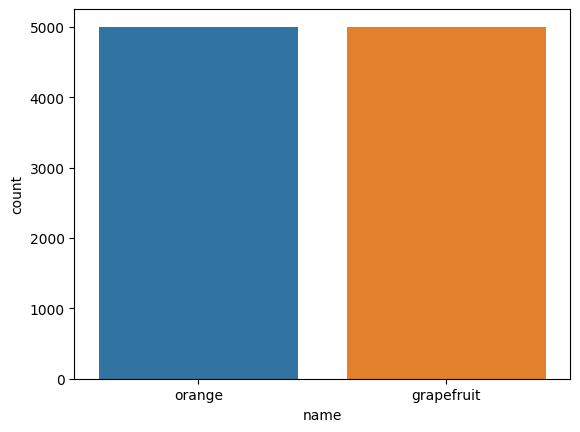

In [ ]:
sns.countplot(data=df, x='name')

In [ ]:
# 데이터 분리하기
# 문자 인코딩하고 범위 맞추는 scaling 진행


In [ ]:
# 2. test data분리

In [ ]:
# citrus.sample-->왜냐면 test가 다 자몽이자나
df.sample(frac=1)

,name,diameter,weight,red,green,blue
4045,orange,9.56,169.62,161,90,7
5991,grapefruit,10.44,180.86,148,56,15
3006,orange,8.80,157.39,156,105,2
9201,grapefruit,12.72,216.56,154,63,20
1401,orange,7.77,141.76,149,78,2
...,...,...,...,...,...,...
555,orange,6.93,130.57,155,97,29
2975,orange,8.78,157.22,158,102,2
6944,grapefruit,11.11,191.93,158,83,10
8156,grapefruit,11.88,203.92,153,73,26


In [ ]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [ ]:
# 입력칼럼 뽑기
x= df[['diameter', 'weight', 'red', 'green', 'blue']]
y= df['name']


In [ ]:
idx = int(len(x)*0.8)
# 8000개를 끊겠다

In [ ]:
x_train = x.iloc[:idx, :]
x_test = x.iloc[idx:, :]

y_train = y[:idx]
y_test= y[idx:]

In [ ]:
x_train.shape, y_test.shape

((8000, 5), (2000,))

In [ ]:
# 전처리 할 것
x_train.head()

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9


In [ ]:
# scaling 맞추기
u=x_train['diameter'].mean()
u

9.30231

In [ ]:
std= x_train['diameter'].std()
std

1.5357683946384124

In [ ]:
x_train['diameter']= (x_train['diameter']-u)/std

<ipython-input-69-73539db45a71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['diameter']= (x_train['diameter']-u)/std


In [ ]:
x_train.head()

,diameter,weight,red,green,blue
0,-4.129731,86.76,172,85,2
1,-3.511148,88.05,166,78,3
2,-3.179067,95.17,156,81,2
3,-3.146510,95.60,163,81,4
4,-3.139998,95.76,161,72,9


In [ ]:
u2= x_train['weight'].mean()
std2= x_train['weight'].std()
x_train['weight']= (x_train['weight']-u2)/std2

u3= x_train['red'].mean()
std3= x_train['red'].std()
x_train['red']= (x_train['red']-u3)/std3

u4= x_train['green'].mean()
std4= x_train['green'].std()
x_train['green']= (x_train['green']-u4)/std4

u5= x_train['blue'].mean()
std5= x_train['blue'].std()
x_train['blue']= (x_train['blue']-u5)/std5

# 테스트 데이터가 들어오면 기존에 사용하였던 식으로 적용하는 데 (train에서 사용하였던 평균 표준편차 구하는 방법)


<ipython-input-71-69fe9991abcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight']= (x_train['weight']-u2)/std2
<ipython-input-71-69fe9991abcd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['red']= (x_train['red']-u3)/std3
<ipython-input-71-69fe9991abcd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
x_train.head()

,diameter,weight,red,green,blue
0,-4.129731,-3.426498,1.677155,0.647714,-0.950654
1,-3.511148,-3.369899,1.098934,0.047711,-0.835733
2,-3.179067,-3.057508,0.135232,0.304855,-0.950654
3,-3.146510,-3.038642,0.809823,0.304855,-0.720812
4,-3.139998,-3.031622,0.617083,-0.466577,-0.146208


In [ ]:
# 3. label incoding

In [ ]:
y_train.map({'grapefruit':0, 'orange':1})

0       1
1       1
2       1
3       1
4       1
       ..
7995    0
7996    0
7997    0
7998    0
7999    0
Name: name, Length: 8000, dtype: int64

In [ ]:
# 3. 학습 (베이스라인 학습)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

# 학습 끝났당

KNeighborsClassifier()

In [ ]:
# 베이스라인의 평가

In [ ]:
x_test['diameter']= (x_test['diameter']-u)/std

x_test['weight']= (x_test['weight']-u2)/std2

x_test['red']= (x_test['red']-u3)/std3

x_test['green']= (x_test['green']-u4)/std4

x_test['blue']= (x_test['blue']-u5)/std5

<ipython-input-84-979a7a76781c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['diameter']= (x_test['diameter']-u)/std
<ipython-input-84-979a7a76781c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['weight']= (x_test['weight']-u2)/std2
<ipython-input-84-979a7a76781c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
y_test = y_test.map({'grapefruit':0, 'orange':1})
y_test

8000   NaN
8001   NaN
8002   NaN
8003   NaN
8004   NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: name, Length: 2000, dtype: float64

In [ ]:
y_pred = clf.predict(x_test)
y_pred

In [ ]:
y_test

8000   NaN
8001   NaN
8002   NaN
8003   NaN
8004   NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: name, Length: 2000, dtype: float64

In [ ]:
y_test = y_test.values
y_test

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
y_pred= y_pred.value


AttributeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

cfm= confusion_matrix(y_test, y_pred)

In [ ]:
sns.heatmap(cfm,annot= True, cmap= 'Blues',fmt= 'd', cvar= False)
s.set(xlabel= 'Prediction', ylabel= 'Actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def print_metrics(y_test, y_pred):
  acc= accuracy_score(y_test, y_pred)
  re= recall_score(y_test, y_pred)
  pr= precision_score(y_test, y_pred)
  f1= f1_score(y_test, y_pred)

print('정확도:', acc)
print('재현율', np.around(re,4))
print('정밀도:', np.around(pr,4))
print('f1:',np.around(f1,4))

NameError: ignored

In [ ]:
def print_metrics(y_test, y_pred):
  acc= accuracy_score(y_test, y_pred)
  re= recall_score(y_test, y_pred)
  pr= precision_score(y_test, y_pred)
  f1= f1_score(y_test, y_pred)

In [ ]:
# 튜닝


In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)


In [ ]:
scores = []
for k in range(3,100):
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  acc= accuracy_score(y_test, y_pred)
  scores.append(acc)

In [ ]:
# score 뽑아보기 그래프로 보기
score
plt.plot(range(3,100),scores)
plt.show()
# k값을 어느정도 정하면 재학습을 시킴

In [ ]:
# 베스트모델(k 재학습)
clf = KNeighborsClassifier(n_neighbors=30)
clf.fit(x_train, y_train)

clf.predict()


In [ ]:
# 그리드 서치 (최적의 파라미터를 찾는 방법)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors' : list(range(3,100)),
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}
clf = KNeighborsClassifier()
grid= GridSearchCV(clf,grid_params, cv= 5)
grid.fit(x_train, y_train)

CPU times: user 3min 37s, sys: 970 ms, total: 3min 38s
Wall time: 3min 12s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]})

In [ ]:
# 랜덤서치
# 주어진 범위 내에서 랜덤으로 뽑아서 돌리기
# 시간 절약할 때는 좋으나 꼼꼼하지 못해서 정확도 찾는 거는 운빨이 있다.

In [ ]:
print('best parameter:',grid.best_params_)
print('best score:', grid.best_score_)

best parameter: {'algorithm': 'ball_tree', 'n_neighbors': 97}
best score: 0.80325


In [ ]:
clf = KNeighborsClassifier(n_neighbors= 97, algorithm= 'ball_tree')
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=97)

In [ ]:
y_pred= clf.predict(x_test)
print_metrics(y_test, y_pred)